In [1]:
import pandas as pd
import numpy as np
import torch
import scipy.stats
from kge.model import KgeModel
from kge.util.io import load_checkpoint

vectors = pd.read_csv('vector_estimates.csv')
vectors

,drug,vector_method,num_neighbours,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
0,CID000003954,actual embedding,NaN,-0.089644,0.070215,0.039417,-0.420712,-0.022252,0.476755,0.095462,...,0.007259,-0.029141,-0.259377,0.267026,0.108330,0.122337,-0.049086,-0.055377,-1.350930,0.040946
1,CID000003954,Generalised inverse,150.0,0.276522,0.006859,-0.030098,-0.408090,-0.096648,0.244188,0.101437,...,-0.019434,-0.293502,0.353921,-0.357333,0.065818,0.132488,0.076210,-0.199647,-0.292554,-0.164859
2,CID000003954,Least squares,150.0,0.276522,0.006859,-0.030098,-0.408091,-0.096648,0.244188,0.101437,...,-0.019434,-0.293502,0.353921,-0.357332,0.065818,0.132488,0.076210,-0.199647,-0.292554,-0.164859
3,CID000003954,1st eigenvec,150.0,-0.018377,0.005799,-0.051114,-0.003759,-0.067734,0.014416,-0.015630,...,-0.015879,0.000587,-0.013302,0.006057,0.014538,-0.012574,0.015263,0.013000,-0.103786,-0.056465
4,CID000003954,mean columns,150.0,0.294525,0.052961,0.289781,-0.051251,0.621494,0.452084,-0.048916,...,0.130208,-0.078158,-0.393616,0.217934,0.459973,-0.093525,0.018807,0.210357,-0.398718,0.191412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,CID000004913,actual embedding,NaN,0.119468,0.090035,0.880989,-0.130732,0.023596,0.945386,-0.103599,...,1.233768,-0.208746,0.413446,0.344618,0.724254,-0.101604,-0.073505,1.122628,-0.385169,0.887730
1361,CID000004913,Generalised inverse,54.0,0.137687,-0.008399,0.030293,0.162502,-0.201118,-0.102428,0.069312,...,0.027524,0.167037,0.075258,-0.005672,0.001797,-0.048878,0.302996,-0.084368,0.004197,-0.106585
1362,CID000004913,Least squares,54.0,0.137687,-0.008399,0.030293,0.162502,-0.201118,-0.102428,0.069312,...,0.027524,0.167037,0.075258,-0.005671,0.001797,-0.048878,0.302996,-0.084367,0.004197,-0.106585
1363,CID000004913,1st eigenvec,54.0,-0.007848,0.008102,-0.006956,-0.001830,0.077321,-0.082498,0.014793,...,-0.085358,0.007104,-0.006353,-0.023261,-0.022470,0.001083,-0.006920,-0.040185,0.012751,-0.006730


In [2]:
def vector_characteristics(vec):
    vec = torch.tensor(vec)
    
    magnitude = vec.norm().item()
    floor = min(vec).item()
    ceiling = max(vec).item()
    range_ = (ceiling-floor)
    mean = np.mean(vec.numpy())
    median = np.median(vec)
    skew = scipy.stats.skew(vec)
    
    return [magnitude, floor, ceiling, range_, mean, median, skew] 

    


In [3]:
attributes = pd.DataFrame(
    columns=[
        'drug', 
        'vector_method', 
        'num_neighbours',
        'magnitude', 
        'floor', 
        'ceiling', 
        'range_', 
        'mean', 
        'median', 
        'skew'
    ]
)

for i, row in vectors.iterrows():
    vec = row[[str(i) for i in range(256)]]
    stats = vector_characteristics(vec)
    result = row[row.index[:3]].tolist() + stats
    attributes.loc[len(attributes)] = result

attributes


,drug,vector_method,num_neighbours,magnitude,floor,ceiling,range_,mean,median,skew
0,CID000003954,actual embedding,NaN,4.915171,-1.414026,1.691568,3.105594,-0.010718,0.004229,-0.215870
1,CID000003954,Generalised inverse,150.0,4.573108,-1.036340,0.875562,1.911902,-0.012184,-0.019587,-0.247905
2,CID000003954,Least squares,150.0,4.573108,-1.036340,0.875562,1.911902,-0.012184,-0.019587,-0.247905
3,CID000003954,1st eigenvec,150.0,1.000000,-0.273790,0.406478,0.680268,0.000467,-0.000050,0.889884
4,CID000003954,mean columns,150.0,4.868303,-1.523613,0.967397,2.491010,-0.009404,-0.019233,-0.582248
...,...,...,...,...,...,...,...,...,...,...
1360,CID000004913,actual embedding,NaN,17.613842,-6.420518,6.671320,13.091838,0.033370,-0.051409,0.678044
1361,CID000004913,Generalised inverse,54.0,1.585035,-0.339923,0.302996,0.642919,-0.001551,0.001528,-0.035641
1362,CID000004913,Least squares,54.0,1.585035,-0.339923,0.302996,0.642919,-0.001551,0.001528,-0.035641
1363,CID000004913,1st eigenvec,54.0,1.000000,-0.302496,0.699095,1.001591,0.002800,-0.000704,5.350749


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

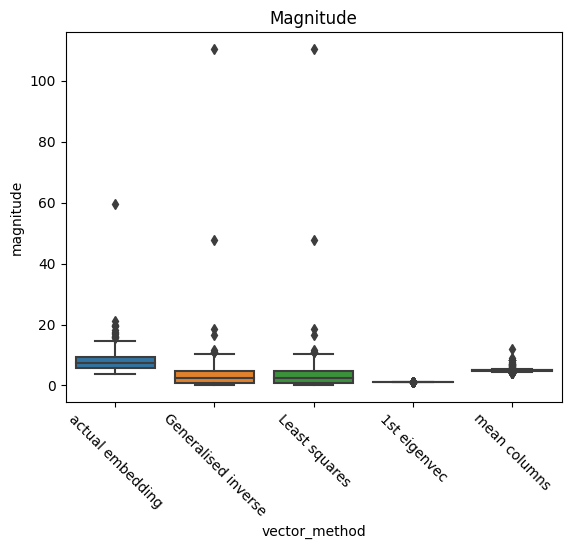

In [11]:
measure = 'magnitude'
sns.boxplot(data=attributes, x='vector_method', y=measure)
plt.title(measure.capitalize())
plt.xticks(rotation=-45)
plt.show()

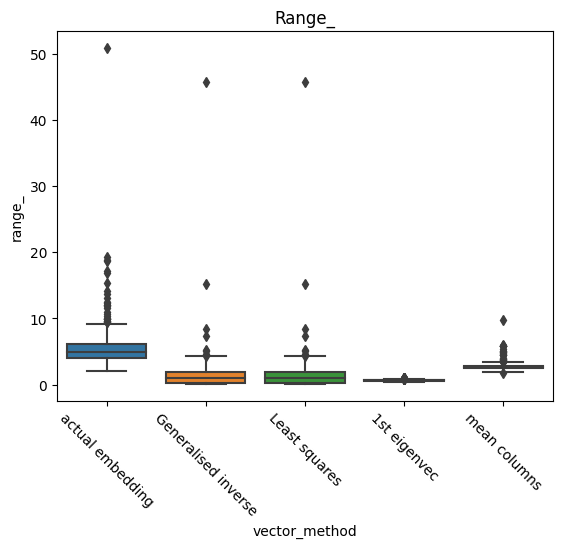

In [12]:
measure = 'range_'
sns.boxplot(data=attributes, x='vector_method', y=measure)
plt.title(measure.capitalize())
plt.xticks(rotation=-45)
plt.show()

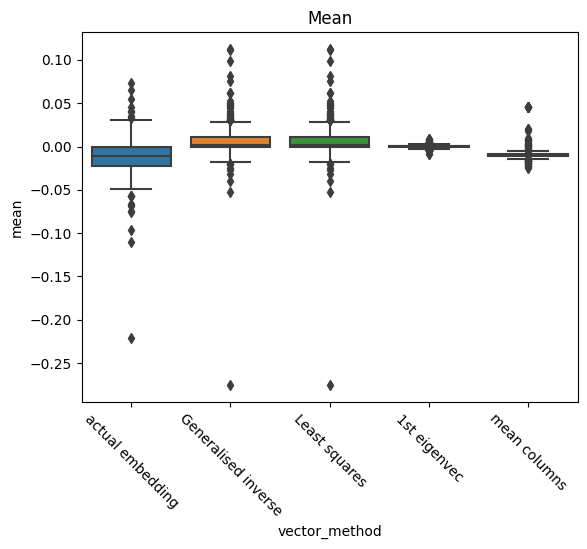

In [13]:
measure = 'mean'
sns.boxplot(data=attributes, x='vector_method', y=measure)
plt.title(measure.capitalize())
plt.xticks(rotation=-45)
plt.show()

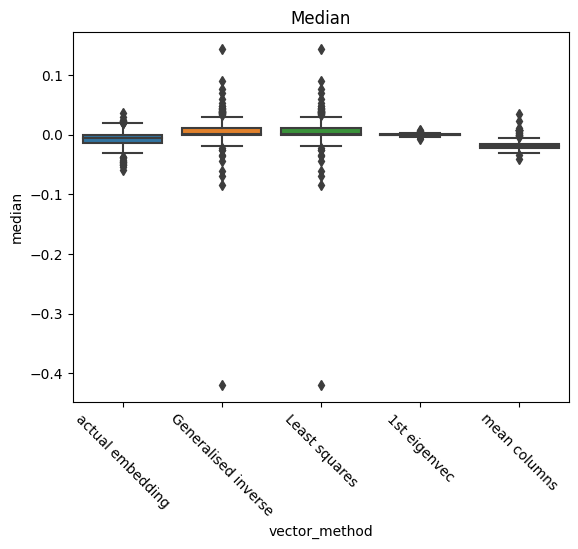

In [14]:
measure = 'median'
sns.boxplot(data=attributes, x='vector_method', y=measure)
plt.title(measure.capitalize())
plt.xticks(rotation=-45)
plt.show()

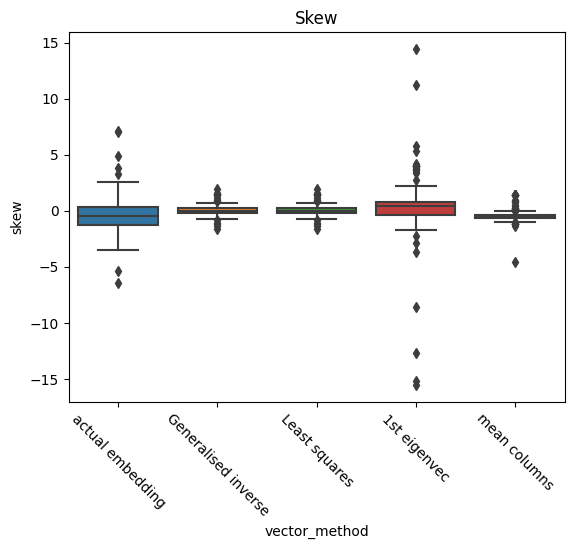

In [15]:
measure = 'skew'
sns.boxplot(data=attributes, x='vector_method', y=measure)
plt.title(measure.capitalize())
plt.xticks(rotation=-45)
plt.show()